In [131]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn. metrics import classification_report, roc_auc_score, roc_curve
import pickle
import streamlit as st
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

In [132]:
# 1. Read data
data = pd.read_csv("spam.csv", encoding='latin-1')

In [133]:
# 2. Data pre-processing
source = data['v2']
target = data['v1']
# ham = 0, spam = 1
target = target.replace("ham", 0)
target = target.replace("spam", 1)

text_data = np.array(source)

count = CountVectorizer(max_features=6000)
count.fit(text_data)
bag_of_words = count.transform(text_data)

X = bag_of_words.toarray()

y = np.array(target)

TypeError: 'module' object is not callable

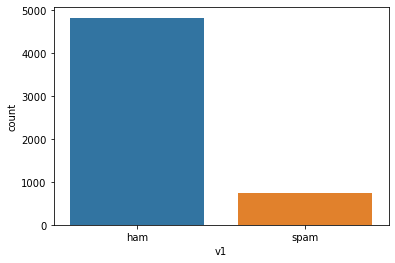

In [134]:
fig1 = sns.countplot(data=data[["v1"]], x="v1")
plt(fig1.figure)

In [135]:
# Word Cloud Generation
df_spam  = data[data.v1 == 'spam'].copy()
df_ham = data[data.v1 == 'ham'].copy()
import wordcloud

def generate_wordcloud(data_frame, v1):
    text = ' '.join(data_frame['v2'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(v1, fontsize=20 )
    plt.show()

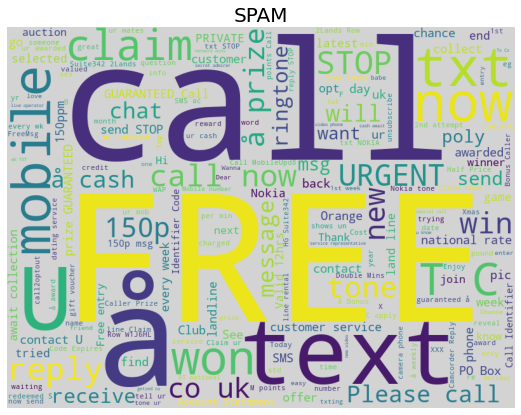

In [136]:
generate_wordcloud(df_spam, 'SPAM')

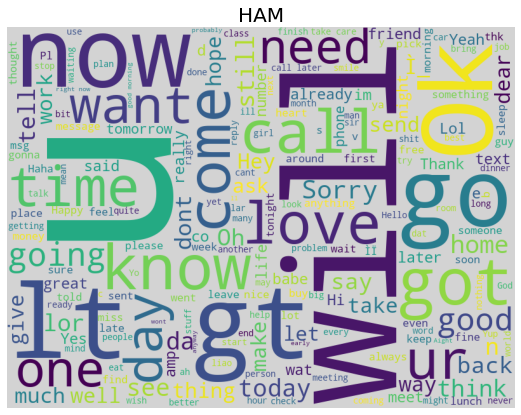

In [137]:
generate_wordcloud(df_ham, 'HAM')

In [138]:
# 3. Build ML model

In [150]:
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) 

SVM Model Accuracy
0.9757847533632287


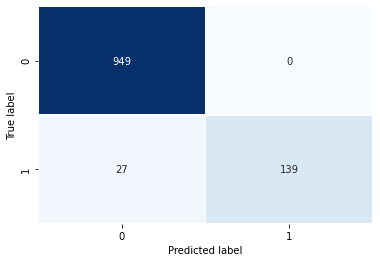

In [156]:
#Support vector Machine
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer

svm_model.fit(X_train, y_train)
print("SVM Model Accuracy")
print(svm_model.score(X_test,y_test))
svm_pred = svm_model.predict(X_test)
plot_confusion_matrix(y_test, svm_pred)


Logistic Regrsssion Model Accuracy
0.9757847533632287


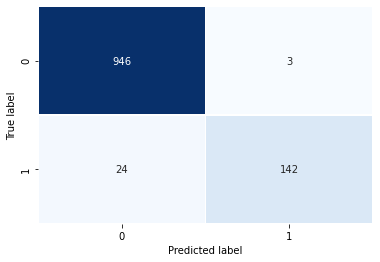

In [143]:
#Logistic Regrsssion
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression(solver='liblinear', penalty='l1')
lg_model.fit(X_train, y_train)
lg_pred = lg_model.predict(X_test)
print("Logistic Regrsssion Model Accuracy")
print(lg_model.score(X_test,y_test))
plot_confusion_matrix(y_test, lg_pred)

In [144]:
# Naive Bayes model
clf = MultinomialNB()
model = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [145]:
#4. Evaluate model
score_train = model.score(X_train,y_train)
score_test = model.score(X_test,y_test)
acc = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

cr = classification_report(y_test, y_pred)

y_prob = model.predict_proba(X_test)
roc = roc_auc_score(y_test, y_prob[:, 1])

In [146]:
print("Accuracy:")
print("Train Score:",round(score_train,4))
print("Train Score:",round(score_test,4))
print("Accuracy:",round(acc,4))
print("ROC Accuracy:",round(roc,4))
print(" ")
print("confusion Matrix:")
print(cm)

Accuracy:
Train Score: 0.9926
Train Score: 0.9874
Accuracy: 0.9874
ROC Accuracy: 0.9906
 
confusion Matrix:
[[944   5]
 [  9 157]]


In [106]:
print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       949
           1       0.97      0.95      0.96       166

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

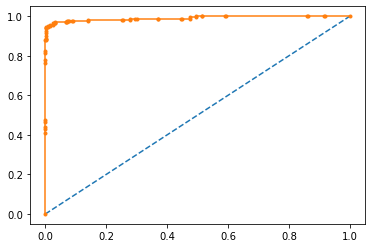

In [107]:
# Calculate ROC Curve
fpr, tpr, threholds = roc_curve(y_test, y_prob[:, 1])
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle="--")
ax.plot(fpr, tpr, marker=".")
st.pyplot(fig)

In [108]:
#Deep Learning Model

In [157]:
# Importing libraries for model building and predictions

# for model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping

# for text preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# split data into train and test set
from sklearn.model_selection import train_test_split

In [158]:
data['v1'] = data['v1'].map( 
    {'spam': 1, 'ham': 0} )

In [159]:
# Splitting dataset for training and test

X = data['v2'].values
y = data['v1'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [160]:
# prepare tokenizer

token = Tokenizer()
token.fit_on_texts(X_train)

In [161]:
encoded_train = token.texts_to_sequences(X_train)
encoded_test = token.texts_to_sequences(X_test)
print(encoded_train[0:2])

[[38, 30, 8, 5, 273, 1989, 81, 116, 26, 11, 1656, 322, 10, 53, 18, 299, 30, 349, 1990], [799, 15, 2555, 1442, 1127, 192, 2556, 171, 12, 98, 1991, 44, 195, 1657, 2557, 1992, 2558, 21, 9, 4, 203, 1025, 225]]


In [162]:
# pad documents to a max length of 8words
max_length = 8

padded_train = pad_sequences(encoded_train, maxlen = max_length, padding = 'post')
padded_test = pad_sequences(encoded_test, maxlen = max_length, padding = 'post')

print(padded_train)

[[ 322   10   53 ...   30  349 1990]
 [1992 2558   21 ...  203 1025  225]
 [  83 1443    4 ...    2 3794 3795]
 ...
 [1477   30 2063 ...  239   30 2064]
 [ 763 1679 1161 ...    0    0    0]
 [   8  155   20 ...    8  290  175]]


In [163]:
vocab_size = len(token.word_index) + 1
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 24, input_length = max_length))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
# summarize the model
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 8, 24)             190920    
                                                                 
 flatten_4 (Flatten)         (None, 192)               0         
                                                                 
 dense_16 (Dense)            (None, 500)               96500     
                                                                 
 dense_17 (Dense)            (None, 200)               100200    
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               20100     
                                                                 
 dense_19 (Dense)            (None, 1)                

In [164]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)
# fit the model
model.fit(x = padded_train,
          y = y_train,
          epochs = 9,
          validation_data = (padded_test, y_test),
          verbose=1,
          callbacks=[early_stop])

Epoch 1/9
140/140 [==============================] - 1s 5ms/step - loss: 0.1948 - accuracy: 0.9251 - val_loss: 0.1072 - val_accuracy: 0.9776
Epoch 2/9
140/140 [==============================] - 1s 4ms/step - loss: 0.0459 - accuracy: 0.9854 - val_loss: 0.0969 - val_accuracy: 0.9776
Epoch 3/9
140/140 [==============================] - 1s 4ms/step - loss: 0.0149 - accuracy: 0.9955 - val_loss: 0.1594 - val_accuracy: 0.9785
Epoch 4/9
140/140 [==============================] - 1s 4ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.2240 - val_accuracy: 0.9794
Epoch 5/9
140/140 [==============================] - 1s 4ms/step - loss: 1.9368e-06 - accuracy: 1.0000 - val_loss: 0.2750 - val_accuracy: 0.9821
Epoch 6/9
140/140 [==============================] - 1s 4ms/step - loss: 5.0445e-08 - accuracy: 1.0000 - val_loss: 0.3122 - val_accuracy: 0.9812
Epoch 7/9
140/140 [==============================] - 1s 4ms/step - loss: 1.5010e-09 - accuracy: 1.0000 - val_loss: 0.3188 - val_accuracy: 0.9812
E

In [165]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : "+ str(acc_sc))
   return acc_sc

def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5, 
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')

In [166]:
preds = (model.predict(padded_test) > 0.5).astype("int32")

35/35 [==============================] - 0s 2ms/step


In [167]:
c_report(y_test, preds)

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.89      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy : 0.9820627802690582


0.9820627802690582

ANN Model Accuracy
0.9820627802690582


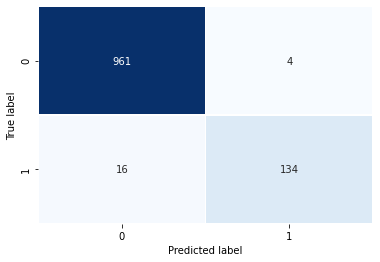

In [169]:
print("ANN Model Accuracy")
print(accuracy_score(y_test, preds))
plot_confusion_matrix(y_test, preds)

In [122]:
model.save("spam_model")

2023-01-11 22:19:54.716 Assets written to: spam_model\assets


In [123]:
import tensorflow as tf

s_model = tf.keras.models.load_model("spam_model")
with open('spam_model/tokenizer.pkl', 'rb') as input:
    tokenizer = pickle.load(input)

In [124]:
sms = ["Hi, I'll be late, lets check this tomorrow "]
sms_proc = token.texts_to_sequences(sms)
sms_proc = pad_sequences(sms_proc, maxlen=max_length, padding='post')
pred = (model.predict(sms_proc) > 0.5).astype("int32").item()
print(pred)

1/1 [==============================] - 0s 18ms/step
0


In [125]:
sms = ["Free entry in 2 a wkly comp to win FA Cup fina..."]
sms_proc = token.texts_to_sequences(sms)
sms_proc = pad_sequences(sms_proc, maxlen=max_length, padding='post')
pred = (model.predict(sms_proc) > 0.5).astype("int32").item()
print(pred)

1/1 [==============================] - 0s 27ms/step
1
